# Kci Korean

In [5]:
import sys
import os 
base_dir = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(base_dir, 'source'))

In [6]:
from utils import * 
import pandas as pd
import re
import numpy as np
import json
from nltk.tokenize import sent_tokenize
import hangul

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# User Configuration
kci_korean_json_filepath = os.path.join(base_dir, 'data', 'kci_korean_sentences_510_191230.json')
with open(kci_korean_json_filepath,"r") as f:
  d = json.load(f)
df = pd.read_json(d)

In [8]:
df['length_of_doc'] = df.apply(lambda x: len(x['sentences']),axis=1)
df.head()

,ID,content,날짜,논문명,주저자,주제분야,학술지명,학회명,sentences,length_of_doc
0,KCI_FI001840759,Journal of Digital Contents Society Vol. 14 No...,2013.12,하둡 기반 빅데이터 영상 처리를 통한 차량 이동경로 추적 시스템의 설계 및 구현,양성은,컴퓨터학,디지털콘텐츠학회논문지,한국디지털콘텐츠학회,"[journal of digital contents society vol, no, ...",9
1,KCI_FI001388853,"韓國컴퓨터情報學會 論文誌\n第14卷 第10號, 2009. 10.\n2009-14-1...",2009.10,분할 가중치 테이블 역전파 신경망을 이용한 구구단 학습 기능성 게임 제작에 관한 연구,이경호,컴퓨터학,한국컴퓨터정보학회논문지,한국컴퓨터정보학회,"[컴퓨터, 분할 가중치 테이블 역전파 신경망을 이용한 구구단 학습 기능성 게임 제작...",238
2,KCI_FI002432663,"한국빅데이터학회지\n제3권 제2호, 2018, pp. 71-78\n머신러닝과 샘플링...",2018.12,머신러닝과 샘플링을 이용한 강원도 지역 산불발생예측모형 개발,채경재,연구개발관리,한국빅데이터학회 학회지,사)한국빅데이터학회,"[한국빅데이터학회지 제 권 제 호 pp, 머신러닝과 샘플링을 이용한 강원도 지역 산...",155
3,KCI_FI002284621,"KIPS Tr. Software and Data Eng.\nVol.6, ...",2017.11,인공 신경망 기반의 고시간 해상도를 갖는 전력수요 예측기법,박진웅,컴퓨터학,정보처리학회논문지. 소프트웨어 및 데이터 공학,한국정보처리학회,"[kips tr, software and data eng, vol, no, pp, ...",277
4,KCI_FI002470322,"한국빅데이터학회지\n제2권 제2호, 2017, pp. 9-16\n글로벌 AI 플랫폼...",2017.12,글로벌 AI 플랫폼 솔루션 서비스와 발전 방향,이강윤,연구개발관리,한국빅데이터학회 학회지,사)한국빅데이터학회,"[한국빅데이터학회지 제 권 제 호 pp, 글로벌 ai 플랫폼 솔루션 서비스와 발전 ...",133


# Outlier Detection
## Document Length

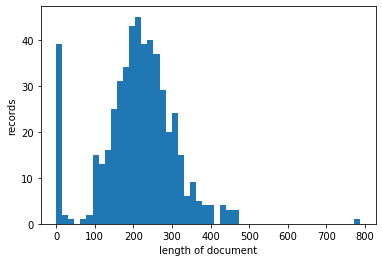

In [9]:
plt.hist(df['length_of_doc'], bins=50)
plt.xlabel('length of document')
plt.ylabel('records')
plt.show()

In [10]:
df[df['length_of_doc'] <= 60].sort_values(by='length_of_doc', ascending=False)[['ID','length_of_doc']]

,ID,length_of_doc
12,KCI_FI002323380,33
467,KCI_FI001673475,18
140,KCI_FI001948368,16
481,KCI_FI001909913,12
64,KCI_FI001811066,12
186,KCI_FI001874099,10
10,KCI_FI001784215,10
153,KCI_FI001894818,10
86,KCI_FI001909908,9
212,KCI_FI001225031,9


In [11]:
df[df['ID']=='KCI_FI002323380']['content'].values

array(['한국컴퓨터그래픽스학회 \nKorea  Computer  Graphics Society\nVol. 24, No. 1, P . 19~26\n\x04\x05\x03\x06\x07\x08 \x08 \n\t\x0b\x08 \x08 \x08 \x0c\x0e\r\x06\x08 \x08 \x11\x10\x0f\x06\x08 \x08 \x08 \x11\x03\x12\x06\x08\n\x08 \x08 \x13\x15\x14\x06\x08 \x08 \n\x0e\x16\x17\x18\n\x06\x1e\x1d\x1a\x1f\x1b\x19\x1c \x08 \x0b!$#("%&#\')\x08 +*\x08 ,+.\'-\x08 /.&\'%01#0 \x08 \x173567482\n\n\x05\t\x06\x07\x08\x04\x03 \x0f\x0b\x07\x08\x0e\x0b\r\x0c\x0f\x04\x03 \x11\x06\x12\x08\x10\x04\x03 \t\x06\x06\x12\x08\x10\x04\x03 \x06\x12\x12\x08\x11\x12\x08\x10\r\x0b\x08\x10\x16\x14\r\x0c\x15\x07\x13\x0f\x0c\x13\r\x0f\x03 \x03 \x03 \x17\x1a\x08\x13\x18\x0c\x0c\x14\x1a\x08\x07\t\x0b\x13\x0c\x19\x1a\x13\x0b\x1a\x03 \x03 \x1c\x12\x1a\x08\x10\x06\x12\x14\x05\x0c\x13\x0e\x12\r\x1b\x12\x13\x0b\x05\x13\r\x0f\n\x1d\x06\x12\x12\x08\t\x1a\x08\x10\x03 \x1e\x06\x07\x08\x06\x1f\x03 \x17\x1a\x08\x03 \x18\x0c\x0c\x0b\x03  \x12\x1a\x08\x10\x0e\x07\x08\x03 !\x07\x0e\x04\x03 "\x07\t\x12\x12\x03 #\x12\x08\x10\x06\x03 \x1e\x1a\x08\x

In [12]:
from unidecode import unidecode

for line in df[df['ID']=='KCI_FI002323380']['content'].values:
    print(unidecode(line))

hangugkeompyuteogeuraepigseuhaghoe 
Korea  Computer  Graphics Society
Vol. 24, No. 1, P . 19~26
  
     
    

  !$#("%&#') +* ,+.'- /.&'%01#0  3567482


	      ! "	 # $# # # !   
 ., ()	
 
9 :;< =>@? A C@?B DE HGF JLKI IMN PO Q
 LR ISB UGVTW UGV XS<
YZ HGF JLKI[\ G A PO] ^`_ THV Rba dcVTW 
e dc_ Rba fhg[ Tij
lmk pnoq IMN PO LK] rF tsB uE J PO Q
a LRVTW UGV XSB vCwI DE 
xN zya t{wn |r} PO LK] ~ PO LK 4V B wTW ?] |r} ts
 W  on  a 4>g[ V ~ ts WN Ra bTW
     $ '-#& 0"%  " %++&" 0 0" "'- "&'#0'#+$ "'-+ 0&" +$ 0 #$+.10% ")" '%0"% *+% (#%'.01
%"01#') 0$ 0."$'" %"01#') 01#0'#+$&W -" %++&" 0" "'- "&'#0'#+$ "'-+ +11"'& 0 #" %0$"
#$*+%0'#+$ +* "0- ")" *%+ '-" ")" '%0"% &.- 0& '-" .#1 "$'"%  0" #%"'#+$  #$'"%

In [14]:
short_length_doc_index = df[df['length_of_doc'] <= 60].index
print('# of short length of document outliers:', len(short_length_doc_index))
df.loc[short_length_doc_index]

# of short length of document outliers: 42


,ID,content,날짜,논문명,주저자,주제분야,학술지명,학회명,sentences,length_of_doc
0,KCI_FI001840759,Journal of Digital Contents Society Vol. 14 No...,2013.12,하둡 기반 빅데이터 영상 처리를 통한 차량 이동경로 추적 시스템의 설계 및 구현,양성은,컴퓨터학,디지털콘텐츠학회논문지,한국디지털콘텐츠학회,"[journal of digital contents society vol, no, ...",9
10,KCI_FI001784215,Journal of Digital Contents Society Vol. 14 No...,2013.06,게임을 위한 계층적 상태 기계 기반의 인공지능 LOD,서진석,컴퓨터학,디지털콘텐츠학회논문지,한국디지털콘텐츠학회,"[journal of digital contents society vol, no, ...",10
11,KCI_FI001927426,Journal of Digital Contents Society Vol. 15 No...,2014.10,증강현실과 페어링을 이용한 SNS 플랫폼의 변화에 대한 연구,노창배,컴퓨터학,디지털콘텐츠학회논문지,한국디지털콘텐츠학회,"[journal of digital contents society vol, no, ...",9
12,KCI_FI002323380,한국컴퓨터그래픽스학회 \nKorea Computer Graphics Societ...,2018.03,착용형 양안 시선추적기와 기계학습을 이용한 시선 초점 거리 추정방법 평가,신춘성,컴퓨터그래픽스이론,한국컴퓨터그래픽스학회논문지,(사)한국컴퓨터그래픽스학회,[한국컴퓨터그래픽스학회 korea computer graphics society v...,33
17,KCI_FI001182914,비단조 추론 게임 엔진\n귀납적 기계학습 엔진\n결과 표현기\n비단조 추론엔진\n규...,2004.02,비단조 추론과 귀납적 기계학습 기반 적응형 전략 게임 엔진,김제민,컴퓨터학,정보처리학회논문지. 소프트웨어 및 데이터 공학,한국정보처리학회,[비단조 추론 게임 엔진 귀납적 기계학습 엔진 결과 표현기 비단조 추론엔진 규칙정의...,7
45,KCI_FI001012338,  \n \n\n...,2006.06,나이브베이즈 문서분류시스템을 위한 선택적샘플링 기반 EM 가속 알고리즘,장재영,공학,정보처리학회논문지D,한국정보처리학회,[에존재하는문서의수 log log],1
47,KCI_FI001322340,DOI: 10.3745/KIPSTD.2009.16-D.1.139\nF\nB\nR\n...,2009.02,인공 신경망의 시냅스 가중치 관리용 도구 개발,신현경,공학,정보처리학회논문지D,한국정보처리학회,"[doi, kipstd, d, f b r m v s n e n o h o k i n...",4
48,KCI_FI001215371,,2007.12,멀티 에이전트 기반의 지능형 시뮬레이션 도구의 개발,우종우,컴퓨터학,한국컴퓨터정보학회논문지,한국컴퓨터정보학회,[],0
49,KCI_FI001004988,\n  \n\n\n\n\n\n\n\n\n\n\n...,2006.03,최적화에 기반을 둔 LAD의 패턴 생성 기법,장인용,컴퓨터학,한국컴퓨터정보학회논문지,한국컴퓨터정보학회,[],0
55,KCI_FI001841217,Journal of Digital Contents Society Vol. 14 No...,2013.12,Levenshtein 거리를 이용한 영화평 감성 분류,안광모,컴퓨터학,디지털콘텐츠학회논문지,한국디지털콘텐츠학회,"[journal of digital contents society vol, no, ...",9


##### Outlier 제거

In [15]:
df = df.drop(short_length_doc_index)

In [16]:
len(df[df['length_of_doc'] <= 60])

0

## Sentence Length

In [17]:
_list = list()
for index, row in df.iterrows():
    for i in range(len(row['sentences'])):
        item = [row['ID'], i, row['sentences'][i], len(row['sentences'][i])]
        _list.append(item)

In [18]:
df_sentence = pd.DataFrame(_list, columns =['ID', 'i', 'sentence', 'length_of_sentence'], dtype = int) 
df_sentence.sort_values(by='length_of_sentence', ascending=False)

,ID,i,sentence,length_of_sentence
56013,KCI_FI002213268,207,x k v p cid cid z g v t cid cid cid cid cid ci...,21763
55945,KCI_FI002213268,139,t pq cid cid cid cid cid cid cid cid cid cid c...,19369
55918,KCI_FI002213268,112,t pq cid cid cid cid cid cid cid cid cid cid c...,18690
39376,KCI_FI002171653,37,또한 shoebox 라는 임시 저장소를 가지는 단계를 통하여 사용자는 데이터를 이 ...,11370
55813,KCI_FI002213268,7,w l vt t zp k j k cid cid cid cid cid cid cid ...,8162
...,...,...,...,...
23955,KCI_FI001394111,185,가,1
23965,KCI_FI001394111,195,다,1
45218,KCI_FI002229021,195,p,1
37612,KCI_FI002301141,243,b,1


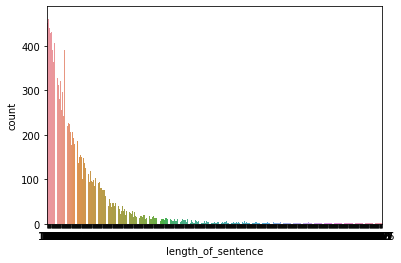

In [19]:
dataset = df_sentence[df_sentence['length_of_sentence']<8000]
dataset = dataset[dataset['length_of_sentence']>100]
ax = sns.countplot(x="length_of_sentence", data=dataset)

In [20]:
df_sentence[df_sentence['length_of_sentence']<10000].sort_values(by='length_of_sentence', ascending=False)

,ID,i,sentence,length_of_sentence
55813,KCI_FI002213268,7,w l vt t zp k j k cid cid cid cid cid cid cid ...,8162
24149,KCI_FI002171146,78,specific task renovation the intelligent const...,3516
24136,KCI_FI002171146,65,steep analysis area content social technologic...,3317
8819,KCI_FI002281408,151,consumption and food related theses of year ti...,2877
70077,KCI_FI002457347,46,리걸테크 는 법률 legal 과 기술 technology 의 합성어로 정보기술을 기...,2759
...,...,...,...,...
55298,KCI_FI002155117,225,표,1
17345,KCI_FI002264464,22,다,1
66910,KCI_FI002257096,55,표,1
72475,KCI_FI002468713,284,p,1


In [21]:
df_sentence.loc[55813]['sentence'][:1000]

'w l vt t zp k j k cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid c

In [22]:
df_sentence[df_sentence['length_of_sentence']<35].sort_values(by='length_of_sentence', ascending=False)

,ID,i,sentence,length_of_sentence
87325,KCI_FI002293749,44,연구로 reinforced authentication 이 있다,34
23205,KCI_FI001899367,46,트위터 피드에서 추출한 사용자들의 감정을 수치화했고 실험 결과,34
92423,KCI_FI002498542,304,shamsuddin feature selection using,34
64904,KCI_FI002397109,167,journal of location based services,34
13085,KCI_FI002322497,107,일반적으로 기계학습 알고리즘에서 가 존재하 로 대체할 수 있다,34
...,...,...,...,...
73972,KCI_FI002272371,185,o,1
45429,KCI_FI002424779,43,다,1
52619,KCI_FI002453032,143,표,1
72446,KCI_FI002468713,255,p,1


In [23]:
df_sentence.loc[64031]['sentence'][:1000]

'이때 철도사고 에 해당하는 탈선 충돌 화재는 전체 철도사고장 애의'

Outlier Sentence Length: 35이하, 8000이상